In [1]:
import csv
import pandas as pd
import seaborn as sns; sns.set()
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc



ImportError: No module named seaborn

In [2]:
!pip install seaborn

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.
  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'SSLError(SSLEOFError(8, u'EOF occurred in violation of protocol (_ssl.c:726)'),)': /simple/seaborn/
  Retrying (Retry(total=3, connect=None, read=None, redirect=None, status=None)) after connection broken by 'SSLError(SSLEOFError(8, u'EOF occurred in violation of protocol (_ssl.c:726)'),)': /simple/seaborn/
  Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'SSLError(SSLEOFError(8, u'EOF occurred in violation of protocol (_ssl.c:726)'),)': /simple/seaborn/
  Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'SSLError(SSLEOFError(8, u'EOF occurred in violation

In [2]:
def Remove_Outlier_Indices(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return trueList


# Reading data
df_user_features = pd.read_csv('data_python/Cele_death_Dataset_user_features.txt', sep='\t')
df_hashtag_features = pd.read_csv('data_python/Cele_death_Dataset_hashtag_features.txt', sep='\t')
df_loc_features = pd.read_csv('data_python/Cele_death_Dataset_loc_features.txt', sep='\t')
df_mention_features = pd.read_csv('data_python/Cele_death_Dataset_mention_features.txt', sep='\t')
df_term_features = pd.read_csv('data_python/Cele_death_Dataset_term_features.txt', sep='\t')



In [3]:
# function to draw boxplots.
def boxplots(df_final,file_name):
    fig, ax = plt.subplots(figsize=(5, 2.5))
    ax.set_yscale('log')

    ax.spines['bottom'].set_color('0')
    ax.spines['top'].set_color('0')
    ax.spines['right'].set_color('0')
    ax.spines['left'].set_color('0')
    sns.boxplot(x='category', y = "mi", data = df_final, palette = "Set1", ax=ax,showfliers=False)
    sns.set(style = "whitegrid")

    plt.rcParams["font.family"] = "courier"
    plt.rc('grid', linestyle=":", color='grey')
    plt.grid(True)
    plt.xlabel("")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.ylabel("Mutual Information")

    #plt.ylim(10e-12, 10e-10)
    plt.savefig(file_name, bbox_inches='tight')
    
    
# function to draw violinplot   
def scatter_plot(x, y, xmin, xmax, ymin, ymax, xlabel, file_name):
    fig, ax = plt.subplots(figsize=(5, 3))
    #ax = sns.kdeplot(x, y, n_levels = 20, cmap = "Purples_d")


    # Basic 2D density plot
    sns.set_style("white")
    sns.kdeplot(x, y)

    # Some features are characteristic of 2D: color palette and wether or not color the lowest range
    ax = sns.kdeplot(x, y, cmap="Blues", shade=True, shade_lowest=True, )

    #ax = sns.kdeplot(x, y, cmap="Reds", shade=True)

    plt.rcParams["font.family"] = "courier"
    plt.rc('grid', linestyle=":", color='grey')
    plt.grid(True)
    plt.xlabel(xlabel)
    #plt.xticks(rotation=30)
    plt.tight_layout()
    plt.ylabel("Mutual Information")


    #ax.set_yscale('log')
    #ax.set_xscale('log')
    ax.set(ylim=(ymin, ymax))
    ax.set(xlim=(xmin, xmax))
    ax.ticklabel_format( axis='y', style='sci', scilimits=None, useOffset=None, useLocale=None, useMathText=None)

    ax.tick_params(color='black', labelcolor='black')
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
    plt.savefig(file_name, bbox_inches='tight')
    
    
# function to draw scatter plot
def violinplot(df_final, ymin, ymax, file_name):
    fig, ax = plt.subplots(figsize=(5, 2.5))
    ax.set_yscale('log')

    ax.spines['bottom'].set_color('0')
    ax.spines['top'].set_color('0')
    ax.spines['right'].set_color('0')
    ax.spines['left'].set_color('0')
    sns.violinplot(x='category', y = "mi", data = df_final, palette = "Set1", ax=ax, scale='area',linewidth = 0.8)
    sns.set(style = "whitegrid")

    plt.rcParams["font.family"] = "courier"
    plt.rc('grid', linestyle=":", color='grey')
    plt.grid(True)
    plt.xlabel("")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.ylabel("Mutual Information")

    plt.ylim(ymin, ymax)
    plt.savefig(file_name, bbox_inches='tight')

# -------------------------------------
#  1. user_favouritesCount
# -------------------------------------


In [4]:
df = df_user_features.drop(columns=['id1','id2','user1','user2','user3','user4','user5','user6','user_tweetCount',
                     'user_followersCount','user_friendsCount','user_hashtagCount']).sort_values('user_favouritesCount')

df1 = df[df['user_favouritesCount'].between(0, 100, inclusive=True)]
df1 = df1.drop(columns=['user_favouritesCount'])
df1['category']='[0,10$^2$]'


df2 = df[df['user_favouritesCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['user_favouritesCount'])
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['user_favouritesCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['user_favouritesCount'])
df3['category']='(10$^3$,10$^4$]'

df4 = df[df['user_favouritesCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['user_favouritesCount'])
df4['category']='(10$^4$,10$^5$]'

df5 = df[df['user_favouritesCount'].between(100001, 1000000, inclusive=True)]
df5 = df5.drop(columns=['user_favouritesCount'])
df5['category']='(10$^5$,10$^6$]'

df_final = df1.append(df2).append(df3).append(df4).append(df5)
# -------------------------------------


## Boxplots

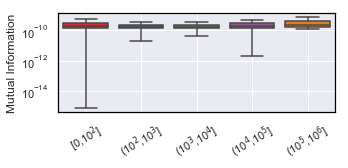

In [5]:
boxplots(df_final,"plots_python/Cele_death_user_favouritesCount_boxplots.eps")

## Scatter plot with KDE

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'courier'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


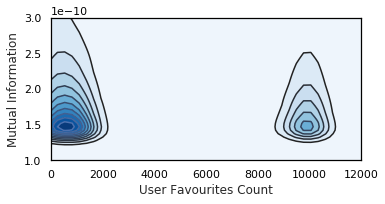

In [6]:
scatter = df
nonOutlierList = Remove_Outlier_Indices(scatter['mi'])
scatter = scatter[nonOutlierList].dropna()
nonOutlierList = Remove_Outlier_Indices(scatter['user_favouritesCount'])
scatter = scatter[nonOutlierList].dropna()

y = scatter['mi'].values
x = scatter['user_favouritesCount'].values

scatter_plot(x, y, 0, 12000, 1e-10, 3e-10, "User Favourites Count", 
             "plots_python/Cele_death_user_favouritesCount_scatter.eps")

## Violinplot

In [7]:
df = df_user_features.drop(columns=['id1','id2','user1','user2','user3','user4','user5','user6','user_tweetCount',
                     'user_followersCount','user_friendsCount','user_hashtagCount']).sort_values('user_favouritesCount')

df1 = df[df['user_favouritesCount'].between(0, 100, inclusive=True)]
df1 = df1.drop(columns=['user_favouritesCount'])
nonOutlierList = Remove_Outlier_Indices(df1)
df1 = df1[nonOutlierList].dropna()
df1['category']='[0,10$^2$]'


df2 = df[df['user_favouritesCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['user_favouritesCount'])
nonOutlierList = Remove_Outlier_Indices(df2)
df2 = df2[nonOutlierList].dropna()
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['user_favouritesCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['user_favouritesCount'])
nonOutlierList = Remove_Outlier_Indices(df3)
df3 = df3[nonOutlierList].dropna()
df3['category']='(10$^3$,10$^4$]'

df4 = df[df['user_favouritesCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['user_favouritesCount'])
nonOutlierList = Remove_Outlier_Indices(df4)
df4 = df4[nonOutlierList].dropna()
df4['category']='(10$^4$,10$^5$]'

df5 = df[df['user_favouritesCount'].between(100001, 1000000, inclusive=True)]
df5 = df5.drop(columns=['user_favouritesCount'])
nonOutlierList = Remove_Outlier_Indices(df5)
df5 = df5[nonOutlierList].dropna()
df5['category']='(10$^5$,10$^6$]'

df_final = df1.append(df2).append(df3).append(df4).append(df5)


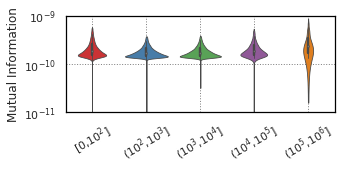

In [8]:
violinplot(df_final,10e-12, 10e-10,
           "plots_python/Cele_death_user_favouritesCount_violinplots.eps")

# -------------------------------------
# 2. user_followersCount
# -------------------------------------

In [9]:
df = df_user_features.drop(columns=['id1','id2','user1','user2','user3','user4','user5','user6','user_tweetCount',
                     'user_favouritesCount','user_friendsCount','user_hashtagCount']).sort_values('user_followersCount')

df1 = df[df['user_followersCount'].between(0, 100, inclusive=True)]
df1 = df1.drop(columns=['user_followersCount'])
df1['category']='[0,10$^2$]'

df2 = df[df['user_followersCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['user_followersCount'])
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['user_followersCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['user_followersCount'])
df3['category']='(10$^3$,10$^4$]'

df4 = df[df['user_followersCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['user_followersCount'])
df4['category']='(10$^4$,10$^5$]'

df5 = df[df['user_followersCount'].between(100001, 1000000, inclusive=True)]
df5 = df5.drop(columns=['user_followersCount'])
df5['category']='(10$^5$,10$^6$]'

df_final = df1.append(df2).append(df3).append(df4).append(df5)

## Boxplots

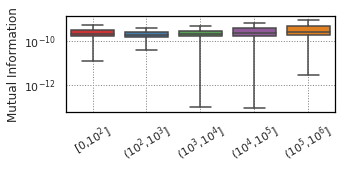

In [10]:
boxplots(df_final,"plots_python/Cele_death_user_followersCount_boxplots.eps")

## Scatter plot with KDE

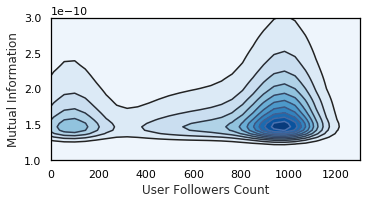

In [11]:
scatter = df
nonOutlierList = Remove_Outlier_Indices(scatter['mi'])
scatter = scatter[nonOutlierList].dropna()
nonOutlierList = Remove_Outlier_Indices(scatter['user_followersCount'])
scatter = scatter[nonOutlierList].dropna()

y = scatter['mi'].values
x = scatter['user_followersCount'].values

scatter_plot(x, y, 0, 1300, 1e-10, 3e-10, "User Followers Count", 
             "plots_python/Cele_death_user_followersCount_scatter.eps")

## Violinplot

In [12]:
df = df_user_features.drop(columns=['id1','id2','user1','user2','user3','user4','user5','user6','user_tweetCount',
                     'user_favouritesCount','user_friendsCount','user_hashtagCount']).sort_values('user_followersCount')

df1 = df[df['user_followersCount'].between(0, 100, inclusive=True)]
df1 = df1.drop(columns=['user_followersCount'])
nonOutlierList = Remove_Outlier_Indices(df1)
df1 = df1[nonOutlierList].dropna()
df1['category']='[0,10$^2$]'

df2 = df[df['user_followersCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['user_followersCount'])
nonOutlierList = Remove_Outlier_Indices(df2)
df2 = df2[nonOutlierList].dropna()
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['user_followersCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['user_followersCount'])
nonOutlierList = Remove_Outlier_Indices(df3)
df3 = df3[nonOutlierList].dropna()
df3['category']='(10$^3$,10$^4$]'

df4 = df[df['user_followersCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['user_followersCount'])
nonOutlierList = Remove_Outlier_Indices(df4)
df4 = df4[nonOutlierList].dropna()
df4['category']='(10$^4$,10$^5$]'

df5 = df[df['user_followersCount'].between(100001, 1000000, inclusive=True)]
df5 = df5.drop(columns=['user_followersCount'])
nonOutlierList = Remove_Outlier_Indices(df5)
df5 = df5[nonOutlierList].dropna()
df5['category']='(10$^5$,10$^6$]'

df_final = df1.append(df2).append(df3).append(df4).append(df5)

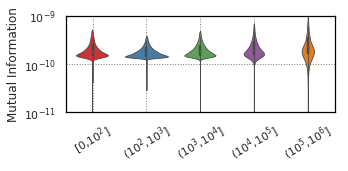

In [13]:
violinplot(df_final,10e-12, 10e-10,
           "plots_python/Cele_death_user_followersCount_violinplots.eps")

# -------------------------------------
# 3. user_friendsCount
# -------------------------------------

In [14]:
df = df_user_features.drop(columns=['id1','id2','user1','user2','user3','user4','user5','user6','user_tweetCount',
                     'user_favouritesCount','user_followersCount','user_hashtagCount']).sort_values('user_friendsCount')

df1 = df[df['user_friendsCount'].between(0, 100, inclusive=True)]
df1 = df1.drop(columns=['user_friendsCount'])
df1['category']='[0,10$^2$]'

df2 = df[df['user_friendsCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['user_friendsCount'])
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['user_friendsCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['user_friendsCount'])
df3['category']='(10$^3$,10$^4$]'

df4 = df[df['user_friendsCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['user_friendsCount'])
df4['category']='(10$^4$,10$^5$]'

df5 = df[df['user_friendsCount'].between(100001, 1000000, inclusive=True)]
df5 = df5.drop(columns=['user_friendsCount'])
df5['category']='(10$^5$,10$^6$]'

df_final = df1.append(df2).append(df3).append(df4).append(df5)

## Boxplots

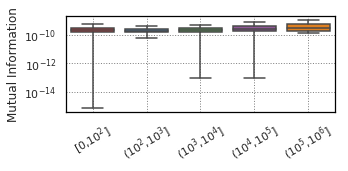

In [15]:
boxplots(df_final,"plots_python/Cele_death_user_friendsCount_boxplots.eps")

## Scatter plot with KDE

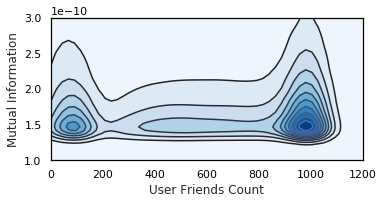

In [16]:
scatter = df
nonOutlierList = Remove_Outlier_Indices(scatter['mi'])
scatter = scatter[nonOutlierList].dropna()
nonOutlierList = Remove_Outlier_Indices(scatter['user_friendsCount'])
scatter = scatter[nonOutlierList].dropna()

y = scatter['mi'].values
x = scatter['user_friendsCount'].values

scatter_plot(x, y, 0, 1200, 1e-10, 3e-10, "User Friends Count", 
             "plots_python/Cele_death_user_friendsCount_scatter.eps")

## Violinplot

In [17]:
df = df_user_features.drop(columns=['id1','id2','user1','user2','user3','user4','user5','user6','user_tweetCount',
                     'user_favouritesCount','user_followersCount','user_hashtagCount']).sort_values('user_friendsCount')

df1 = df[df['user_friendsCount'].between(0, 100, inclusive=True)]
df1 = df1.drop(columns=['user_friendsCount'])
nonOutlierList = Remove_Outlier_Indices(df1)
df1 = df1[nonOutlierList].dropna()
df1['category']='[0,10$^2$]'


df2 = df[df['user_friendsCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['user_friendsCount'])
nonOutlierList = Remove_Outlier_Indices(df2)
df2 = df2[nonOutlierList].dropna()
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['user_friendsCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['user_friendsCount'])
nonOutlierList = Remove_Outlier_Indices(df3)
df3 = df3[nonOutlierList].dropna()
df3['category']='(10$^3$,10$^4$]'

df4 = df[df['user_friendsCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['user_friendsCount'])
nonOutlierList = Remove_Outlier_Indices(df4)
df4 = df4[nonOutlierList].dropna()
df4['category']='(10$^4$,10$^5$]'

df5 = df[df['user_friendsCount'].between(100001, 1000000, inclusive=True)]
df5 = df5.drop(columns=['user_friendsCount'])
nonOutlierList = Remove_Outlier_Indices(df5)
df5 = df5[nonOutlierList].dropna()
df5['category']='(10$^5$,10$^6$]'

df_final = df1.append(df2).append(df3).append(df4).append(df5)

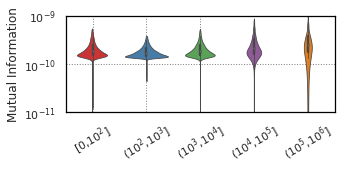

In [18]:
violinplot(df_final,10e-12, 10e-10,
           "plots_python/Cele_death_user_friendsCount_violinplots.eps")

# -------------------------------------
# 4. user_hashtagCount
# -------------------------------------

In [19]:
df = df_user_features.drop(columns=['id1','id2','user1','user2','user3','user4','user5','user6','user_tweetCount',
                     'user_favouritesCount','user_followersCount','user_friendsCount']).sort_values('user_hashtagCount')

df1 = df[df['user_hashtagCount'].between(0, 100, inclusive=True)]
df1 = df1.drop(columns=['user_hashtagCount'])
df1['category']='[0,10$^2$]'

df2 = df[df['user_hashtagCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['user_hashtagCount'])
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['user_hashtagCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['user_hashtagCount'])
df3['category']='(10$^3$,10$^4$]'

df_final = df1.append(df2).append(df3)

## Boxplots

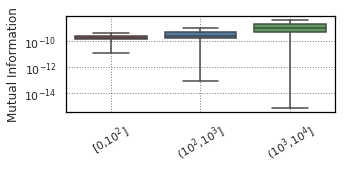

In [20]:
boxplots(df_final,"plots_python/Cele_death_user_hashtagCount_boxplots.eps")

## Scatter plot with KDE

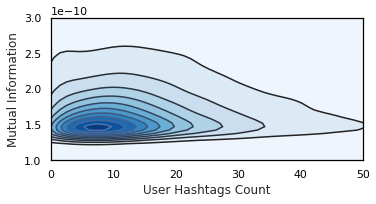

In [21]:
scatter = df
nonOutlierList = Remove_Outlier_Indices(scatter['mi'])
scatter = scatter[nonOutlierList].dropna()
nonOutlierList = Remove_Outlier_Indices(scatter['user_hashtagCount'])
scatter = scatter[nonOutlierList].dropna()

y = scatter['mi'].values
x = scatter['user_hashtagCount'].values
scatter_plot(x, y, 0, 50, 1e-10, 3e-10, "User Hashtags Count", 
             "plots_python/Cele_death_user_hashtagCount_scatter.eps")

## Violinplot

In [22]:
df = df_user_features.drop(columns=['id1','id2','user1','user2','user3','user4','user5','user6','user_tweetCount',
                     'user_favouritesCount','user_followersCount','user_friendsCount']).sort_values('user_hashtagCount')

df1 = df[df['user_hashtagCount'].between(0, 100, inclusive=True)]
df1 = df1.drop(columns=['user_hashtagCount'])
nonOutlierList = Remove_Outlier_Indices(df1)
df1 = df1[nonOutlierList].dropna()
df1['category']='[0,10$^2$]'

df2 = df[df['user_hashtagCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['user_hashtagCount'])
nonOutlierList = Remove_Outlier_Indices(df2)
df2 = df2[nonOutlierList].dropna()
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['user_hashtagCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['user_hashtagCount'])
nonOutlierList = Remove_Outlier_Indices(df3)
df3 = df3[nonOutlierList].dropna()
df3['category']='(10$^3$,10$^4$]'

df_final = df1.append(df2).append(df3)

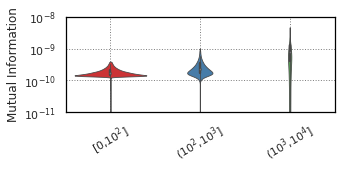

In [23]:
violinplot(df_final,10e-12, 10e-9,
           "plots_python/Cele_death_user_hashtagCount_violinplots.eps")

# -------------------------------------
# 5. user_tweetCount
# -------------------------------------

In [24]:
df = df_user_features.drop(columns=['id1','id2','user1','user2','user3','user4','user5','user6','user_friendsCount',
                     'user_favouritesCount','user_followersCount','user_hashtagCount']).sort_values('user_tweetCount')

df2 = df[df['user_tweetCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['user_tweetCount'])
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['user_tweetCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['user_tweetCount'])
df3['category']='(10$^3$,10$^4$]'

df4 = df[df['user_tweetCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['user_tweetCount'])
df4['category']='(10$^4$,10$^5$]'

df_final = df2.append(df3).append(df4)

## Boxplots

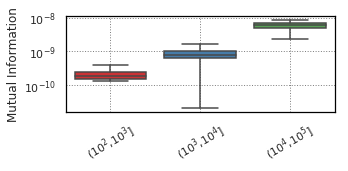

In [25]:
boxplots(df_final,"plots_python/Cele_death_user_tweetCount_boxplots.eps")

## Scatter plot with KDE

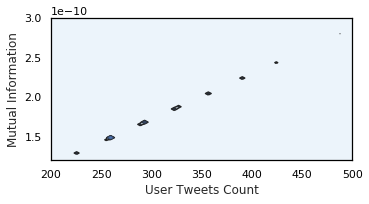

In [26]:
scatter = df
nonOutlierList = Remove_Outlier_Indices(scatter['mi'])
scatter = scatter[nonOutlierList].dropna()
nonOutlierList = Remove_Outlier_Indices(scatter['user_tweetCount'])
scatter = scatter[nonOutlierList].dropna()

y = scatter['mi'].values
x = scatter['user_tweetCount'].values

scatter_plot(x, y, 200, 500, 1.2e-10, 3e-10, "User Tweets Count", 
             "plots_python/Cele_death_user_tweetCount_scatter.eps")

## Violinplot

In [27]:
df = df_user_features.drop(columns=['id1','id2','user1','user2','user3','user4','user5','user6','user_friendsCount',
                     'user_favouritesCount','user_followersCount','user_hashtagCount']).sort_values('user_tweetCount')

df2 = df[df['user_tweetCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['user_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df2)
df2 = df2[nonOutlierList].dropna()
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['user_tweetCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['user_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df3)
df3 = df3[nonOutlierList].dropna()
df3['category']='(10$^3$,10$^4$]'

df4 = df[df['user_tweetCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['user_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df4)
df4 = df4[nonOutlierList].dropna()
df4['category']='(10$^4$,10$^5$]'

df_final = df2.append(df3).append(df4)

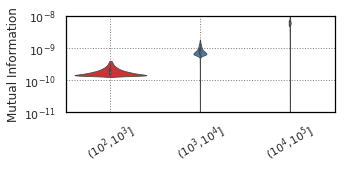

In [28]:
violinplot(df_final,10e-12, 10e-9,
           "plots_python/Cele_death_user_tweetCount_violinplots.eps")

# -------------------------------------
# 6. hashtag_tweetCount
# -------------------------------------

In [29]:
df = df_hashtag_features.drop(columns=['id1','id2','hashtag1','hashtag2','hashtag3',
                     'hashtag_userCount']).sort_values('hashtag_tweetCount')

df1 = df[df['hashtag_tweetCount'].between(0, 100, inclusive=True)]
df1 = df1.drop(columns=['hashtag_tweetCount'])
df1['category']='[0,10$^2$]'

df2 = df[df['hashtag_tweetCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['hashtag_tweetCount'])
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['hashtag_tweetCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['hashtag_tweetCount'])
df3['category']='(10$^3$,10$^4$]'

df4 = df[df['hashtag_tweetCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['hashtag_tweetCount'])
df4['category']='(10$^4$,10$^5$]'

df5 = df[df['hashtag_tweetCount'].between(100001, 1000000, inclusive=True)]
df5 = df5.drop(columns=['hashtag_tweetCount'])
df5['category']='(10$^5$,10$^6$]'

df_final = df1.append(df2).append(df3).append(df4).append(df5)


## Boxplots

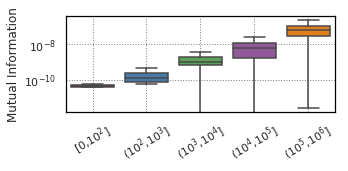

In [30]:
boxplots(df_final,"plots_python/Cele_death_hashtag_tweetCount_boxplots.eps")

## Scatter plot with KDE


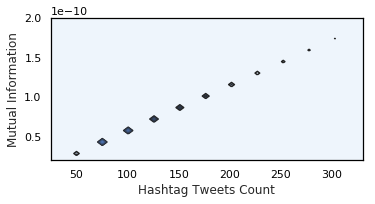

In [31]:
scatter = df
nonOutlierList = Remove_Outlier_Indices(scatter['mi'])
scatter = scatter[nonOutlierList].dropna()
nonOutlierList = Remove_Outlier_Indices(scatter['hashtag_tweetCount'])
scatter = scatter[nonOutlierList].dropna()

y = scatter['mi'].values
x = scatter['hashtag_tweetCount'].values

scatter_plot(x, y, 25, 330, 0.2e-10,2e-10, "Hashtag Tweets Count", 
             "plots_python/Cele_death_hashtag_tweetCount_scatter.eps")

## Violinplot

In [32]:
df = df_hashtag_features.drop(columns=['id1','id2','hashtag1','hashtag2','hashtag3',
                     'hashtag_userCount']).sort_values('hashtag_tweetCount')

df1 = df[df['hashtag_tweetCount'].between(0, 100, inclusive=True)]
df1 = df1.drop(columns=['hashtag_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df1)
df1 = df1[nonOutlierList].dropna()
df1['category']='[0,10$^2$]'

df2 = df[df['hashtag_tweetCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['hashtag_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df2)
df2 = df2[nonOutlierList].dropna()
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['hashtag_tweetCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['hashtag_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df3)
df3 = df3[nonOutlierList].dropna()
df3['category']='(10$^3$,10$^4$]'

df4 = df[df['hashtag_tweetCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['hashtag_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df4)
df4 = df4[nonOutlierList].dropna()
df4['category']='(10$^4$,10$^5$]'

df5 = df[df['hashtag_tweetCount'].between(100001, 1000000, inclusive=True)]
df5 = df5.drop(columns=['hashtag_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df5)
df5 = df5[nonOutlierList].dropna()
df5['category']='(10$^5$,10$^6$]'

df_final = df1.append(df2).append(df3).append(df4).append(df5)


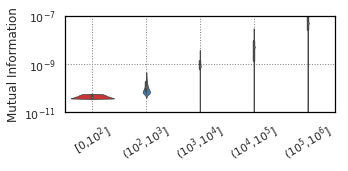

In [33]:
violinplot(df_final,10e-12, 10e-8,
           "plots_python/Cele_death_hashtag_tweetCount_violinplots.eps")

# -------------------------------------
# 7. hashtag_userCount
# -------------------------------------

In [34]:
df = df_hashtag_features.drop(columns=['id1','id2','hashtag1','hashtag2','hashtag3',
                     'hashtag_tweetCount']).sort_values('hashtag_userCount')

df1 = df[df['hashtag_userCount'].between(0, 100, inclusive=True)]
df1 = df1.drop(columns=['hashtag_userCount'])
df1['category']='[0,10$^2$]'

df2 = df[df['hashtag_userCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['hashtag_userCount'])
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['hashtag_userCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['hashtag_userCount'])
df3['category']='(10$^3$,10$^4$]'

df4 = df[df['hashtag_userCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['hashtag_userCount'])
df4['category']='(10$^4$,10$^5$]'

df5 = df[df['hashtag_userCount'].between(100001, 1000000, inclusive=True)]
df5 = df5.drop(columns=['hashtag_userCount'])
df5['category']='(10$^5$,10$^6$]'

df_final = df1.append(df2).append(df3).append(df4).append(df5)

## Boxplots

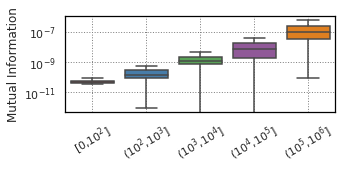

In [35]:
boxplots(df_final,"plots_python/Cele_death_hashtag_userCount_boxplots.eps")

## Scatter plot with KDE

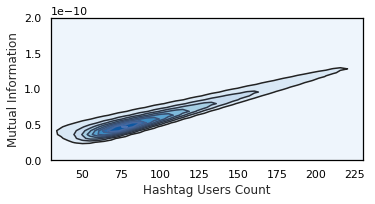

In [36]:
scatter = df
nonOutlierList = Remove_Outlier_Indices(scatter['mi'])
scatter = scatter[nonOutlierList].dropna()
nonOutlierList = Remove_Outlier_Indices(scatter['hashtag_userCount'])
scatter = scatter[nonOutlierList].dropna()

y = scatter['mi'].values
x = scatter['hashtag_userCount'].values

scatter_plot(x, y, 30, 230, 0e-10, 2e-10, "Hashtag Users Count", 
             "plots_python/Cele_death_hashtag_userCount_scatter.eps")

## Violinplot

In [37]:
df = df_hashtag_features.drop(columns=['id1','id2','hashtag1','hashtag2','hashtag3',
                     'hashtag_tweetCount']).sort_values('hashtag_userCount')

df1 = df[df['hashtag_userCount'].between(0, 100, inclusive=True)]
df1 = df1.drop(columns=['hashtag_userCount'])
nonOutlierList = Remove_Outlier_Indices(df1)
df1 = df1[nonOutlierList].dropna()
df1['category']='[0,10$^2$]'

df2 = df[df['hashtag_userCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['hashtag_userCount'])
nonOutlierList = Remove_Outlier_Indices(df2)
df2 = df2[nonOutlierList].dropna()
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['hashtag_userCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['hashtag_userCount'])
nonOutlierList = Remove_Outlier_Indices(df3)
df3 = df3[nonOutlierList].dropna()
df3['category']='(10$^3$,10$^4$]'

df4 = df[df['hashtag_userCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['hashtag_userCount'])
nonOutlierList = Remove_Outlier_Indices(df4)
df4 = df4[nonOutlierList].dropna()
df4['category']='(10$^4$,10$^5$]'

df5 = df[df['hashtag_userCount'].between(100001, 1000000, inclusive=True)]
df5 = df5.drop(columns=['hashtag_userCount'])
nonOutlierList = Remove_Outlier_Indices(df5)
df5 = df5[nonOutlierList].dropna()
df5['category']='(10$^5$,10$^6$]'

df_final = df1.append(df2).append(df3).append(df4).append(df5)

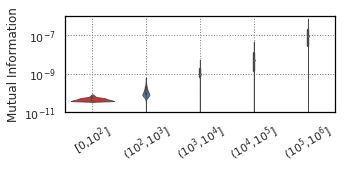

In [38]:
violinplot(df_final,10e-12, 10e-7,
           "plots_python/Cele_death_hashtag_userCount_violinplots.eps")

# -------------------------------------
# 8. location_userCount
# -------------------------------------

In [39]:
df = df_loc_features.drop(columns=['id1','id2','location1','location2']).sort_values('location_userCount')

df1 = df[df['location_userCount'].between(0, 100, inclusive=True)]
df1 = df1.drop(columns=['location_userCount'])
df1['category']='[0,10$^2$]'

df2 = df[df['location_userCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['location_userCount'])
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['location_userCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['location_userCount'])
df3['category']='(10$^3$,10$^4$]'

df4 = df[df['location_userCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['location_userCount'])
df4['category']='(10$^4$,10$^5$]'

df5 = df[df['location_userCount'].between(100001, 1000000, inclusive=True)]
df5 = df5.drop(columns=['location_userCount'])
df5['category']='(10$^5$,10$^6$]'

df_final = df1.append(df2).append(df3).append(df4).append(df5)

## Boxplots

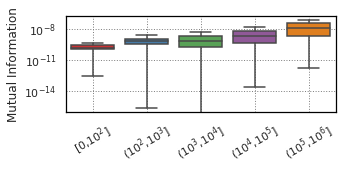

In [40]:
boxplots(df_final,"plots_python/Cele_death_location_userCount_boxplots.eps")

## Scatter plot with KDE

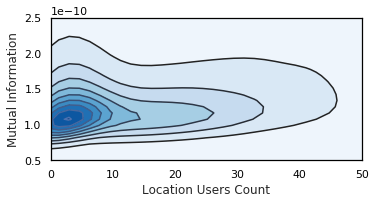

In [41]:
scatter = df
nonOutlierList = Remove_Outlier_Indices(scatter['mi'])
scatter = scatter[nonOutlierList].dropna()
nonOutlierList = Remove_Outlier_Indices(scatter['location_userCount'])
scatter = scatter[nonOutlierList].dropna()

y = scatter['mi'].values
x = scatter['location_userCount'].values

scatter_plot(x, y, 0, 50, 0.5e-10, 2.5e-10, "Location Users Count", 
             "plots_python/Cele_death_location_userCount_scatter.eps")

## violinplot

In [42]:
df = df_loc_features.drop(columns=['id1','id2','location1','location2']).sort_values('location_userCount')

df1 = df[df['location_userCount'].between(0, 100, inclusive=True)]
df1 = df1.drop(columns=['location_userCount'])
nonOutlierList = Remove_Outlier_Indices(df1)
df1 = df1[nonOutlierList].dropna()
df1['category']='[0,10$^2$]'

df2 = df[df['location_userCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['location_userCount'])
nonOutlierList = Remove_Outlier_Indices(df2)
df2 = df2[nonOutlierList].dropna()
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['location_userCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['location_userCount'])
nonOutlierList = Remove_Outlier_Indices(df3)
df3 = df3[nonOutlierList].dropna()
df3['category']='(10$^3$,10$^4$]'

df4 = df[df['location_userCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['location_userCount'])
nonOutlierList = Remove_Outlier_Indices(df4)
df4 = df4[nonOutlierList].dropna()
df4['category']='(10$^4$,10$^5$]'

df5 = df[df['location_userCount'].between(100001, 1000000, inclusive=True)]
df5 = df5.drop(columns=['location_userCount'])
nonOutlierList = Remove_Outlier_Indices(df5)
df5 = df5[nonOutlierList].dropna()
df5['category']='(10$^5$,10$^6$]'

df_final = df1.append(df2).append(df3).append(df4).append(df5)


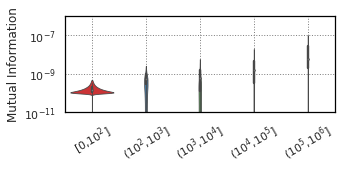

In [43]:
violinplot(df_final,10e-12, 10e-7,
           "plots_python/Cele_death_location_userCount_violinplots.eps")

# -------------------------------------
# 9. mention_tweetCount
# -------------------------------------


In [44]:
df = df_mention_features.drop(columns=['id1','id2','mention1','mention2']).sort_values('mention_tweetCount')

df2 = df[df['mention_tweetCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['mention_tweetCount'])
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['mention_tweetCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['mention_tweetCount'])
df3['category']='(10$^3$,10$^4$]'

df4 = df[df['mention_tweetCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['mention_tweetCount'])
df4['category']='(10$^4$,10$^5$]'

df5 = df[df['mention_tweetCount'].between(100001, 1000000, inclusive=True)]
df5 = df5.drop(columns=['mention_tweetCount'])
df5['category']='(10$^5$,10$^6$]'

df_final = df1.append(df2).append(df3).append(df4).append(df5)

## Boxplots

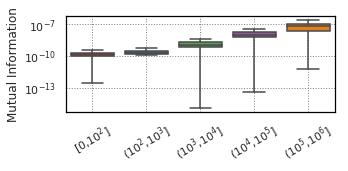

In [45]:
boxplots(df_final,"plots_python/Cele_death_mention_tweetCount_boxplots.eps")

## Scatter plot with KDE

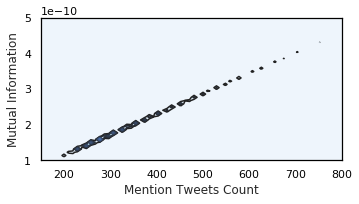

In [46]:
scatter = df
nonOutlierList = Remove_Outlier_Indices(scatter['mi'])
scatter = scatter[nonOutlierList].dropna()
nonOutlierList = Remove_Outlier_Indices(scatter['mention_tweetCount'])
scatter = scatter[nonOutlierList].dropna()

y = scatter['mi'].values
x = scatter['mention_tweetCount'].values

scatter_plot(x, y, 150, 800, 1e-10,5e-10, "Mention Tweets Count", 
             "plots_python/Cele_death_mention_tweetCount_scatter.eps")

## violinplot

In [47]:
df = df_mention_features.drop(columns=['id1','id2','mention1','mention2']).sort_values('mention_tweetCount')

df2 = df[df['mention_tweetCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['mention_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df2)
df2 = df2[nonOutlierList].dropna()
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['mention_tweetCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['mention_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df3)
df3 = df3[nonOutlierList].dropna()
df3['category']='(10$^3$,10$^4$]'

df4 = df[df['mention_tweetCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['mention_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df4)
df4 = df4[nonOutlierList].dropna()
df4['category']='(10$^4$,10$^5$]'

df5 = df[df['mention_tweetCount'].between(100001, 1000000, inclusive=True)]
df5 = df5.drop(columns=['mention_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df5)
df5 = df5[nonOutlierList].dropna()
df5['category']='(10$^5$,10$^6$]'

df_final = df1.append(df2).append(df3).append(df4).append(df5)


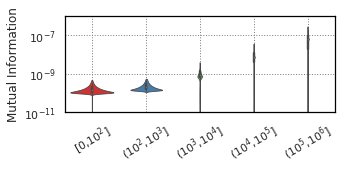

In [48]:
violinplot(df_final,10e-12, 10e-7,
           "plots_python/Cele_death_mention_tweetCount_violinplots.eps")

# -------------------------------------
# 10. term_tweetCount
# -------------------------------------

In [49]:
df = df_term_features.drop(columns=['id1','id2','term1','term2']).sort_values('term_tweetCount')

df2 = df[df['term_tweetCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['term_tweetCount'])
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['term_tweetCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['term_tweetCount'])
df3['category']='(10$^3$,10$^4$]'

df4 = df[df['term_tweetCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['term_tweetCount'])
df4['category']='(10$^4$,10$^5$]'

df5 = df[df['term_tweetCount'].between(100001, 1000000, inclusive=True)]
df5 = df5.drop(columns=['term_tweetCount'])
df5['category']='(10$^5$,10$^6$]'

df_final = df1.append(df2).append(df3).append(df4).append(df5)

## Boxplots

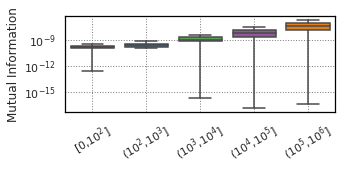

In [50]:
boxplots(df_final,"plots_python/Cele_death_term_tweetCount_boxplots.eps")

## Scatter plot with KDE

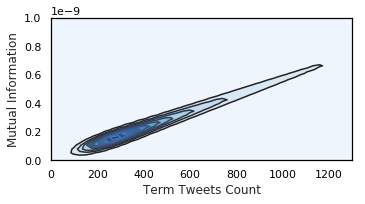

In [51]:
scatter = df
nonOutlierList = Remove_Outlier_Indices(scatter['mi'])
scatter = scatter[nonOutlierList].dropna()
nonOutlierList = Remove_Outlier_Indices(scatter['term_tweetCount'])
scatter = scatter[nonOutlierList].dropna()

y = scatter['mi'].values
x = scatter['term_tweetCount'].values

scatter_plot(x, y, 0, 1300, 0e-10, 10e-10, "Term Tweets Count", 
             "plots_python/Cele_death_term_tweetCount_scatter.eps")


# violinplot

In [52]:
df = df_term_features.drop(columns=['id1','id2','term1','term2']).sort_values('term_tweetCount')

df2 = df[df['term_tweetCount'].between(101, 1000, inclusive=True)]
df2 = df2.drop(columns=['term_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df2)
df2 = df2[nonOutlierList].dropna()
df2['category']='(10$^2$,10$^3$]'

df3 = df[df['term_tweetCount'].between(1001, 10000, inclusive=True)]
df3 = df3.drop(columns=['term_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df3)
df3 = df3[nonOutlierList].dropna()
df3['category']='(10$^3$,10$^4$]'

df4 = df[df['term_tweetCount'].between(10001, 100000, inclusive=True)]
df4 = df4.drop(columns=['term_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df4)
df4 = df4[nonOutlierList].dropna()
df4['category']='(10$^4$,10$^5$]'

df5 = df[df['term_tweetCount'].between(100001, 1000000, inclusive=True)]
df5 = df5.drop(columns=['term_tweetCount'])
nonOutlierList = Remove_Outlier_Indices(df5)
df5 = df5[nonOutlierList].dropna()
df5['category']='(10$^5$,10$^6$]'

df_final = df1.append(df2).append(df3).append(df4).append(df5)


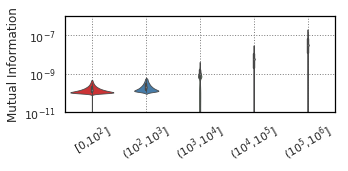

In [53]:
violinplot(df_final,10e-12, 10e-7,
           "plots_python/Cele_death_term_tweetCount_violinplots.eps")